In [101]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [102]:
link = "https://corgis-edu.github.io/corgis/csv/"
response = requests.get(link)

In [103]:
html_string = response.text
document = BeautifulSoup(html_string,"html.parser")

In [104]:
h3_tags = document.find_all("h3")
csv_names = []

for name in h3_tags:
    csv_names.append(name.text)
    
# Below are the names of Corgis dataset 
csv_names

['Aids',
 'Airlines',
 'Billionaires',
 'Broadway',
 'Business Dynamics',
 'Cancer',
 'Cars',
 'Classics',
 'Construction Permits',
 'Construction Spending',
 'County Demographics',
 'Covid',
 'Drugs',
 'Earthquakes',
 'Election',
 'Electricity',
 'Emissions',
 'Energy',
 'Finance',
 'Food',
 'Food Access',
 'Global Development',
 'Graduates',
 'Health',
 'Hospitals',
 'Hydropower',
 'Ingredients',
 'Injuries',
 'Labor',
 'Medal Of Honor',
 'Music',
 'Opioids',
 'Police Shootings',
 'Publishers',
 'Real Estate',
 'Retail Services',
 'School Scores',
 'Skyscrapers',
 'Slavery',
 'State Crime',
 'State Demographics',
 'State Fragility',
 'Suicide Attacks',
 'Supreme Court',
 'Tate',
 'Video Games',
 'Weather',
 'Wind Turbines']

In [105]:
def pdcorgis(dataset_name):
    
    name_for_link = dataset_name.replace(" ","").lower()
    link_to_csv_page = "https://corgis-edu.github.io/corgis/csv/" + name_for_link + "/"
    response = requests.get(link_to_csv_page)
    document = BeautifulSoup(response.text,"html.parser")
    for each_link in document.find_all("a"):
        if each_link.has_attr("download"):
            csv_download_link = link_to_csv_page + each_link['href']
            corgisdf = pd.read_csv(csv_download_link)
    return corgisdf

<AxesSubplot:title={'center':'Number of people Living with HIV in 1990 Afghanistan'}, xlabel='Year', ylabel='Number of people'>

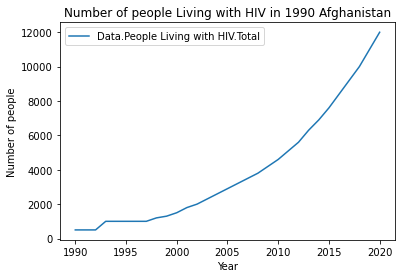

In [106]:
# Line graph for Aids Dataset 
aids = pdcorgis("Aids")
afghanistan = aids[aids["Country"] == "Afghanistan"]
afghanistan.plot.line(y="Data.People Living with HIV.Total",x="Year",
                     xlabel="Year",ylabel="Number of people",
                     title="Number of people Living with HIV in 1990 Afghanistan")

<AxesSubplot:title={'center':"Cars with height of 140's average number of Forward Gears versus Engine type"}, xlabel='Engine Information.Driveline'>

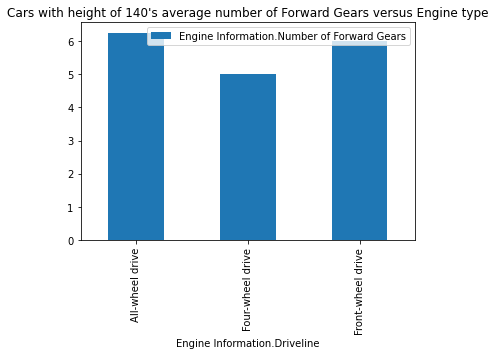

In [107]:
# Bar graph for Cars Dataset 
cars = pdcorgis("Cars")
height140 = cars[cars["Dimensions.Height"] == 140]
height140.groupby("Engine Information.Driveline").mean().plot(kind="bar",
                                                             y="Engine Information.Number of Forward Gears",
                                                             title="Cars with height of 140's average number of Forward Gears versus Engine type")

<AxesSubplot:title={'center':'Histogram of amount of water in food, measured in g'}, ylabel='Frequency'>

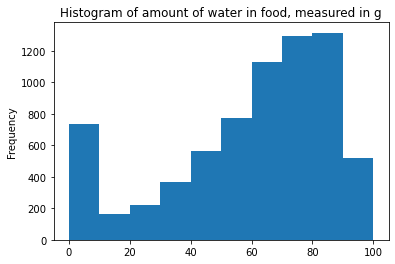

In [109]:
# Histogram for Food Dataset 
food = pdcorgis("Food")
food["Data.Water"].plot.hist(title = "Histogram of amount of water in food, measured in g")